## Latar Belakang

**Netflix baru-baru ini sangat berfokus pada konten Original karena sekarang memiliki studio TV dan filmnya sendiri. Fokus ini membantu perusahaan mengurangi ketergantungan pada studio luar dan mengambil kendali atas konten aslinya (Netflix, 2021).**

Netflix adalah platform streaming yang populer yang menyediakan berbagai macam film, acara TV, dan konten video lainnya. Pelanggan Netflix dapat menonton konten favorit mereka dengan streaming langsung melalui internet pada perangkat seperti komputer, ponsel pintar, tablet, atau televisi cerdas. Netflix menawarkan berbagai genre termasuk drama, komedi, tindakan, animasi, dokumenter, dan banyak lagi. Platform ini juga menghasilkan konten asli yang dikenal sebagai "Netflix Originals", yang merupakan produksi eksklusif yang hanya tersedia di Netflix.

Netflix Originals adalah istilah yang digunakan untuk mengacu pada konten yang diproduksi atau didistribusikan secara eksklusif oleh Netflix. Ini termasuk film, acara TV, seri dokumenter, komedi stand-up, dan konten lainnya yang diproduksi atau dibiayai oleh Netflix. Netflix Originals dapat berarti konten yang dikembangkan sepenuhnya oleh Netflix, serta konten yang diakuisisi dari studio atau produser independen dan ditayangkan secara eksklusif di platform Netflix.

Netflix Originals telah menjadi bagian penting dari strategi konten Netflix, yang memungkinkan mereka menghasilkan konten eksklusif yang menarik bagi para pelanggan dan membedakan diri dari layanan streaming lainnya.

## Pernyataan Masalah

Untuk menghasilkan konten original yang beragam dan menarik bagi para pelanggan, Netflix telah mengalokasikan anggaran yang signifikan. Karena untuk mengembangkan konten orisinal itu tergolong membutuhkan biaya yang sangat mahal.

Karena skala produksinya yang lebih kecil, _short film_ biasanya memiliki anggaran yang lebih rendah dan tim produksi yang lebih kecil dibandingkan dengan feature film yang umumnya melibatkan sutradara, produser, pemeran, dan kru produksi yang lebih besar.

Sebagai seorang data analyst tujuan utamanya adalah membantu perusahaan dalam mengidentifikasi tren dan pola dalam data Original Netflix untuk memperbaiki layanan. Hasil dari analisa ini akan menjadi bahan pertimbangan kepada stakeholder yaitu Chief Content Officer terkait permasalahan berikut:

- Menganalisa apakah mengkategorikan Film Original Netflix menjadi Short Film and Feature films akan lebih tepat sasaran buat pelanggan.
- Perbandingan antara Short Film dan Feature Film berdasarkan Total Filmnya.
- Perbandingan antara Short Film dan Feature Film berdasarkan rata-rata Skor IMDB.
- Perbandingan antara Short Film dan Feature Film berdasarkan rata-rata Skor IMDB pertahunnya.

## Source Data
Untuk menjawab pertanyaan di atas, kita akan menganalisa data Film Netflix Original yang sudah dikumpulkan oleh perusahaan. Dataset dapat diakses [di sini](https://www.kaggle.com/datasets/luiscorter/netflix-original-films-imdb-scores). 

In [3]:
import pandas as pd
import numpy as np
import datetime as dt
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

## Data Understanding and Cleaning

In [4]:
df = pd.read_csv('Netflix Originals.csv')
df = df.drop(columns='Unnamed: 0')
df.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,#REALITYHIGH,Comedy,"September 8, 2017",99,5.2,English
1,13th,Documentary,"October 7, 2016",100,8.2,English
2,13th: A Conversation with Oprah Winfrey & Ava ...,Aftershow / Interview,"January 26, 2017",36,7.1,English
3,15 August,Comedy-drama,"March 29, 2019",124,5.8,Marathi
4,1922,Horror/Crime drama,"October 20, 2017",102,6.3,English


In [5]:
print('This dataframe contains {} rows and {} columns'.format(df.shape[0], df.shape[1]))

This dataframe contains 584 rows and 6 columns


Terdapat 584 data film orisinal Netflix teratas dengan genre yang berbeda. Kumpulan data ini terdiri dari semua film asli Netflix yang dirilis per 1 Juni 2021. Selain itu, kumpulan ini juga mencakup semua film dokumenter dan spesial Netflix.

Dataset ini berisi informasi terkait Film Original Netflix. Ada 6 kolom di dalam dataset 'Netflix Original.csv' ini, yaitu:

- Title: Title of the film
- Genre: Genre of the film
- Premiere: Origina lpremiere date
- Runtime: Runtime in minutes
- IMDBScore: IMDB scores (as of 06/01/21)
- Language: Languages currently available (as of 06/01/21)

In [62]:
df.dtypes

Title           object
Genre           object
Premiere        object
Runtime          int64
IMDB Score     float64
Language        object
Year             int64
Film          category
dtype: object

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Title       584 non-null    object  
 1   Genre       584 non-null    object  
 2   Premiere    584 non-null    object  
 3   Runtime     584 non-null    int64   
 4   IMDB Score  580 non-null    float64 
 5   Language    584 non-null    object  
 6   Year        584 non-null    int64   
 7   Film        584 non-null    category
dtypes: category(1), float64(1), int64(2), object(4)
memory usage: 32.8+ KB


In [67]:
df.isnull().sum()

(True,
 Title         0
 Genre         0
 Premiere      0
 Runtime       0
 IMDB Score    4
 Language      0
 Year          0
 Film          0
 dtype: int64)

In [66]:
df.isna().sum()/df.shape[0]*100

Title         0.000000
Genre         0.000000
Premiere      0.000000
Runtime       0.000000
IMDB Score    0.684932
Language      0.000000
Year          0.000000
Film          0.000000
dtype: float64

In [68]:
df.duplicated().sum()

0

In [69]:
df.describe([0.05, 0.25, 0.50, 0.75, 0.95, 0.99]).T

,count,mean,std,min,5%,25%,50%,75%,95%,99%,max
Runtime,584.0,93.577055,27.761683,4.0,30.150,86.0,97.0,108.0,132.0,149.000,209.0
IMDB Score,580.0,6.277414,0.978380,2.5,4.595,5.7,6.4,7.0,7.7,8.321,9.0
Year,584.0,2018.936644,1.473992,2014.0,2016.000,2018.0,2019.0,2020.0,2021.0,2021.000,2021.0


<Axes: >

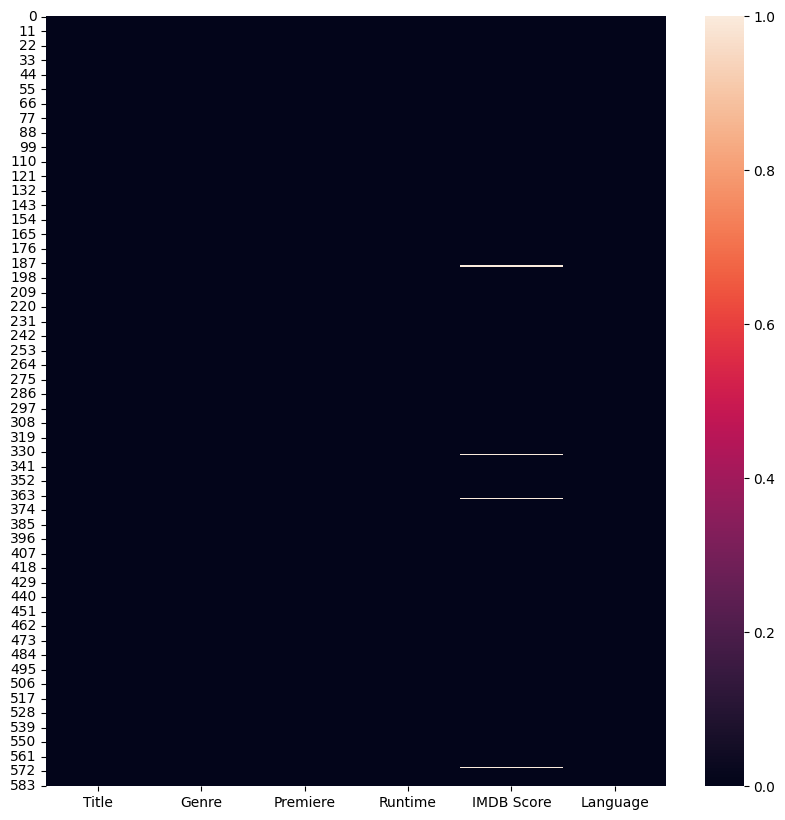

In [51]:
plt.figure(figsize=(10,10))
sns.heatmap(df[['Title','Genre','Premiere','Runtime','IMDB Score','Language']].isna())


Bisa dilihat sebaran missing value yang hanya terdapat di dalam kolom IMDB Score dengan Jumlah data kosong yaitu 4.

**Change Datetime**

In [8]:
df["Premiere"] = pd.to_datetime(df['Premiere'])

df['Year'] = df['Premiere'].dt.year

df.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language,Year
0,#REALITYHIGH,Comedy,2017-09-08,99,5.2,English,2017
1,13th,Documentary,2016-10-07,100,8.2,English,2016
2,13th: A Conversation with Oprah Winfrey & Ava ...,Aftershow / Interview,2017-01-26,36,7.1,English,2017
3,15 August,Comedy-drama,2019-03-29,124,5.8,Marathi,2019
4,1922,Horror/Crime drama,2017-10-20,102,6.3,English,2017


In [9]:
df['Year'].unique()

array([2017, 2016, 2019, 2018, 2020, 2015, 2021, 2014], dtype=int64)

In [10]:
df['Year'].value_counts()

2020    183
2019    125
2018     99
2021     71
2017     66
2016     30
2015      9
2014      1
Name: Year, dtype: int64

**Simpan data yang sudah di cleaning dan di formating.**

Untuk kolom yang terdapat Missing Value, disini dilakukan pengisian manual langsung di microsoft excel karena hanya terdapat 4 data yang Nan yaitu terdapat pada kolom IMDB Score.

In [11]:
# df.to_csv('Netflix Clean.csv')

**Data yang sudah bersih**

In [12]:
df = pd.read_csv('Netflix Clean.csv')
df = df.drop(columns=['Unnamed: 0'])
df.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language,Year
0,#REALITYHIGH,Comedy,2017-09-08,99,5.2,English,2017
1,13th,Documentary,2016-10-07,100,8.2,English,2016
2,13th: A Conversation with Oprah Winfrey & Ava ...,Aftershow / Interview,2017-01-26,36,7.1,English,2017
3,15 August,Comedy-drama,2019-03-29,124,5.8,Marathi,2019
4,1922,Horror/Crime drama,2017-10-20,102,6.3,English,2017


In [13]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df.shape)
dfDesc

(584, 7)


,dataFeatures,dataType,null,unique,uniqueSample
0,Title,object,0,584,"[The Death and Life of Marsha P. Johnson, The ..."
1,Genre,object,0,115,"[Science fiction thriller, Anime / Short]"
2,Premiere,object,0,387,"[2020-07-03, 2021-04-29]"
3,Runtime,int64,0,124,"[94, 12]"
4,IMDB Score,float64,4,54,"[7.4, 7.6]"
5,Language,object,0,38,"[Japanese, Norwegian]"
6,Year,int64,0,8,"[2021, 2020]"


# Data Analysis
Setelah melakukan tahap _data cleaning_. Sekarang, bisa mulai melakukan analisis untuk mencari tahu **bagaimana karakteristik data Film Netflix Original**.  

Untuk menganalisis karakteristik data Film Netflix Original berdasarkan kategori Short Film dan Feature Film, dapat dimulai dengan membagi data menjadi dua grup berdasarkan runtime. Kemudian, dapat delihat perbedaan dan kesamaan antara kedua grup tersebut dalam hal karakteristik seperti genre, rating, popularitas, dan lain-lain.

In [46]:
fig = px.histogram(df, x='IMDB Score', title='Histogram of IMDB Score')
fig.show()

In [47]:
fig = px.histogram(df, x='Runtime', title='Histogram of Runtime')
fig.show()

Palette warna Netflix

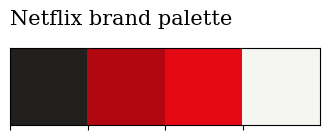

In [41]:
palette = sns.palplot(['#221f1f', '#b20710', '#e50914','#f5f5f1'])

plt.title("Netflix brand palette ",loc='left',fontfamily='serif',fontsize=15,y=1.2)
plt.show()

In [49]:
fig = px.scatter(df, x="Runtime", y="IMDB Score", color="IMDB Score", hover_name="Title",
                 title='Hubungan antara IMDB Score dan Runtime')
fig.show()

In [ ]:
count_runtime = df_runtime['Year'].value_counts()

fig = go.Figure(data=[go.Bar(
    x = count_runtime.index,
    y = count_runtime,
    text = count_runtime,
    textposition= 'auto',
    marker_color = ['#e50914']
)])
fig.update_traces(textposition='outside')
fig.update_layout(title_text= 'Jumlah Film Netflix Original setiap Tahunnya',
                  uniformtext_minsize=7, uniformtext_mode='hide',
                  height=700,
                  yaxis=dict(
                  title='Quantity',
                  titlefont_size=14),
                  xaxis=dict(
                  title='Duration',
                  titlefont_size=12))

Dari total 584 film Netflix Original, jumlah tertinggi tercatat pada tahun 2020 dengan 183 film. Pada tahun tersebut, Netflix secara aktif merilis banyak konten Original baru yang meliputi film-film mereka. Ini menunjukkan komitmen Netflix dalam memproduksi konten orisinal yang beragam dan berkualitas tinggi.

Namun, pada tahun 2021, jumlah film Netflix Original menurun drastis menjadi 71 film. Penurunan ini bisa disebabkan oleh berbagai faktor seperti penyesuaian strategi produksi dan fokus pada seri TV atau dokumenter daripada film. Perubahan tren dan preferensi pemirsa juga dapat mempengaruhi jumlah film yang dirilis pada tahun tersebut

**Menentukan batas kelompok berdasarkan durasi runtime**

In [32]:
limit = [0, 40, float('inf')]
labels = ['Short Film', 'Feature Film']

# Menambahkan kolom 'Feature' berdasarkan durasi runtime
df['Film'] = pd.cut(df['Runtime'], bins= limit, labels=labels)

df.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language,Year,Film
0,#REALITYHIGH,Comedy,2017-09-08,99,5.2,English,2017,Feature Film
1,13th,Documentary,2016-10-07,100,8.2,English,2016,Feature Film
2,13th: A Conversation with Oprah Winfrey & Ava ...,Aftershow / Interview,2017-01-26,36,7.1,English,2017,Short Film
3,15 August,Comedy-drama,2019-03-29,124,5.8,Marathi,2019,Feature Film
4,1922,Horror/Crime drama,2017-10-20,102,6.3,English,2017,Feature Film


Pembagain film ini mengacu pada Academy of Motion Picture Arts and Sciences yang mendefinisikan film pendek sebagai "sebuah film orisinal yang berdurasi 40 menit atau kurang, termasuk semua kredit"

**Jumlah Film berdasarkan pembagian antara Short film dan Feature film**

In [ ]:
df['Film'].value_counts()

Feature Film    537
Short Film       47
Name: Film, dtype: int64

Dari hasil Pembagian diatas, yang termasuk kedalam kategori Short Film sebanyak 47 data dan yang termasuk ke dalam kategori Feature Film sebanyak 537 data.

dibawah ini berikut untuk Visualisasi datanya.

In [ ]:
# df.to_csv('Netflix Clean2.csv')

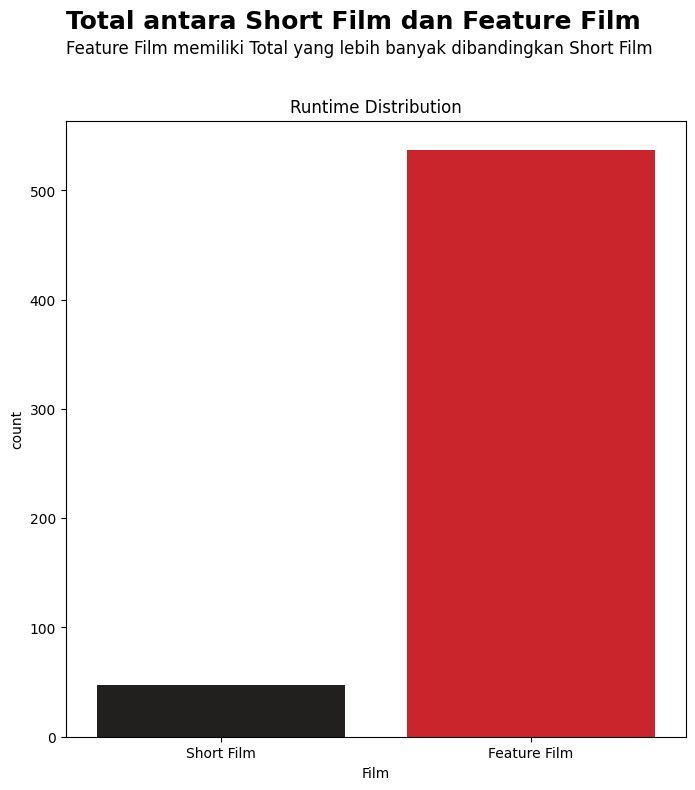

In [50]:
plt.figure(figsize = (8,8))
income = sns.countplot(x = df['Film'], palette = ['#221f1f', '#e50914'])
income.set_title('Runtime Distribution')

xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()

plt.text(s="Total antara Short Film dan Feature Film", 
        ha='left', x=xmin, y=ymax*1.15, 
        fontsize=18, fontweight='bold', 
        color='black')
plt.text(s="Feature Film memiliki Total yang lebih banyak dibandingkan Short Film", 
        ha='left', x=xmin, y=ymax*1.11, 
        fontsize=12, fontweight='normal', 
        color='black')

plt.show()

In [ ]:
df_runtime = df.dropna(subset=['Film'])
df_runtime.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language,Year,Feature,Film
0,#REALITYHIGH,Comedy,2017-09-08,99,5.2,English,2017,Feature Film,Feature Film
1,13th,Documentary,2016-10-07,100,8.2,English,2016,Feature Film,Feature Film
2,13th: A Conversation with Oprah Winfrey & Ava ...,Aftershow / Interview,2017-01-26,36,7.1,English,2017,Short Film,Short Film
3,15 August,Comedy-drama,2019-03-29,124,5.8,Marathi,2019,Feature Film,Feature Film
4,1922,Horror/Crime drama,2017-10-20,102,6.3,English,2017,Feature Film,Feature Film


**Distribusi Jumlah Film pertahunnya berdasakan Feature**

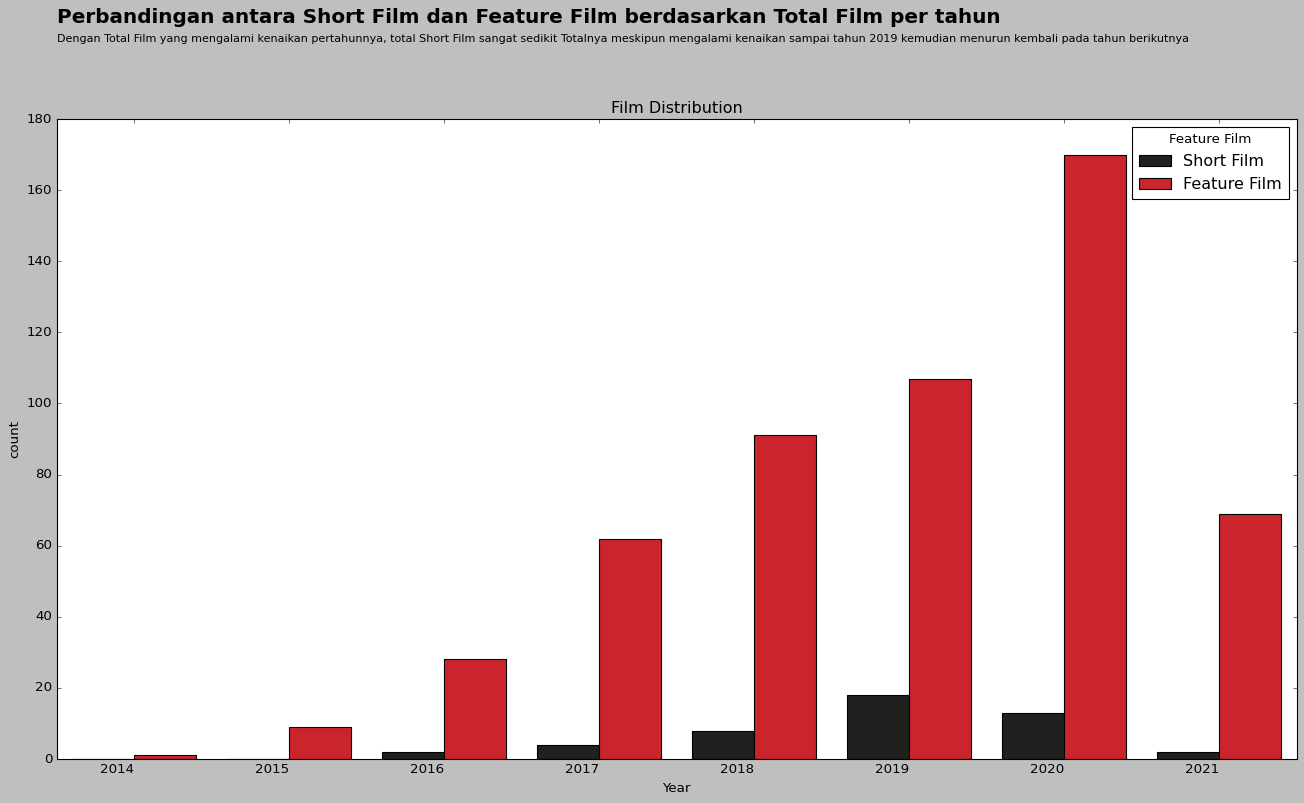

In [ ]:
plt.figure(figsize = (20,10))
age_income_distribution = sns.countplot(x = df['Year'], hue = df['Film'], palette = ['#221f1f', '#e50914'])
age_income_distribution.set_xticklabels(age_income_distribution.get_xticklabels(), 
                                        horizontalalignment='right')
age_income_distribution.set_title('Film Distribution')
plt.legend(title = 'Feature Film', loc='upper right')
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()

plt.text(s="Perbandingan antara Short Film dan Feature Film berdasarkan Total Film per tahun", 
        ha='left', x=xmin, y=ymax*1.15, 
        fontsize=18, fontweight='bold', 
        color='black')
plt.text(s="Dengan Total Film yang mengalami kenaikan pertahunnya, total Short Film sangat sedikit Totalnya meskipun mengalami kenaikan sampai tahun 2019 kemudian menurun kembali pada tahun berikutnya", 
        ha='left', x=xmin, y=ymax*1.12, 
        fontsize=10, fontweight='normal', 
        color='black')
plt.show()

In [53]:
# The Average of IMDB Score between Short Film and Length Film


df.groupby("Film").agg({"IMDB Score": "mean"}).sort_values(by="IMDB Score", ascending=False)[0:10]
genrescore_on = df.groupby("Film").agg({"IMDB Score": "mean"}).sort_values(by="IMDB Score", ascending=False)[
                0:10].reset_index()

print (df.groupby("Film").agg({"IMDB Score": "mean"}).sort_values(by="IMDB Score", ascending=False)[0:10])

              IMDB Score
Film                    
Short Film      6.682609
Feature Film    6.242509


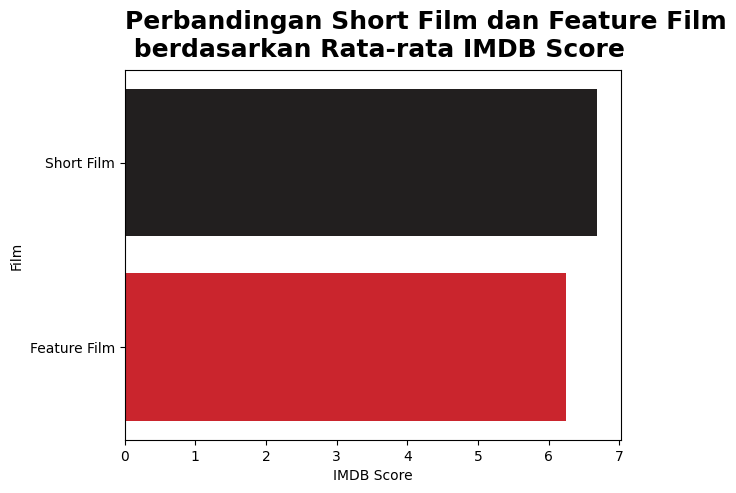

In [60]:
sns.barplot(y=genrescore_on["Film"], x=genrescore_on["IMDB Score"], palette=['#221f1f', '#e50914'])

xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()

plt.text(s="Perbandingan Short Film dan Feature Film", 
        ha='left', x=xmin, y=ymax*1.45, 
        fontsize=18, fontweight='bold', 
        color='black')
plt.text(s=" berdasarkan Rata-rata IMDB Score", 
        ha='left', x=xmin, y=ymax*1.15, 
        fontsize=18, fontweight='bold', 
        color='black')

plt.show()

Dari grapik diatas bisa dilihat bahwa nilai rata-rata IMDB Short Film lebih besar daripada Feature Film. sedangkan pada grapik sebelumnya telah diketahui bahwa jumlah data yang tergolong kategori Short Feature masih sangat sedikit dibandingkan dengan jumlah Feature Film.

<img src="image/Sheet 4.png" alt="deskripsi gambar" width="1200">

Dilihat dari nilai rata-rata IMDB score pertahunnya, film yang masuk kategori Short Film mempunyai rata-rata IMDB Score yang lebih besar dibandingkan dengan nilai rata-rata IMDB Score dengan kategori Feature Film

## Kesimpulan dan Rekomendasi 

**Kesimpulan**

Dari analisis yang telah dilakukan, bisa diambil keputusan terkait film apa yang mau ditingkatkan produksinya:
Terdapat 584 data pada dataset Netflix Original, dimana terdapat Missing Value sebanyak 4 pada kolom IMDB Score.
* Pada 4 data yang dinyatakan Missing Value yang bisa dikatakan hanya 0.7% dari data keseluruhan. Maka diambil keputusan untuk mengisi kolom tersebut dengan cara Manual menggunakan Microsoft Excel, alih-alih melakukan Drop table yang memungkinkan berkurangnya data yang tergolong minim.
* Dari 584 data yang ada, terdapat 47 data yang bisa di kategorikan sebagai short film dan 537 data sebagai Feature film.
* Film dengan kategori Short Film mendapatkan nilai rata-rata IMDB Score yaitu 6.68, sedangkan Feature Film mendapatkan nilai rata-rata IMDB Score yaitu 6.24
* Nilai rata-rata IMDB score untuk Short Film masih tinggi dibandingkan dengan nilai rata-rata nilai IMDB Score untuk Feature Film.
* Meskiput Jumlah Short Film masih tergolong sangat sedikit namun memiliki nilai rata-rata IMDB Score yang tinggi dibandingkat Feature Film

**Rekomendasi**

Netflix dapat meningkatkan jumlah short film karena produksi mereka lebih efisien dan biayanya lebih terjangkau dibandingkan dengan film fitur. Dengan mengalokasikan lebih banyak sumber daya untuk mengembangkan short film, Netflix dapat meningkatkan variasi konten dan menarik penonton yang lebih luas.

Dengan mengimplementasikan rekomendasi ini, Netflix dapat meningkatkan jumlah short film Netflix Original yang diproduksi. Hal ini akan memberikan variasi dan pilihan yang lebih luas bagi penonton, 

<h1>"It’s always about quality over quantity." 🥇 </h1>

## Referensi

- https://noamkroll.com/how-long-does-a-movie-need-to-be-to-qualify-as-feature-film-length-it-may-be-less-than-you-think/
- https://www.howandwhat.net/5c-analysis-netflix-5cs-netflix/